In [28]:
import pandas as pd

In [29]:
df_work_hr_2018 = pd.read_csv('WorkHRsector.csv')
df_work_hr_2018

,Industry,Total,Male,Female
0,Total,44.0,48.0,39.0
1,Agriculture forestry and fishing,36.0,40.0,33.0
2,Mining and quarrying,45.0,46.0,40.0
3,Manufacturing,45.0,50.0,35.0
4,Electricity gas and water supply,48.9,49.9,42.9
5,Construction,50.0,50.0,50.0
6,Wholesale and retail trade,46.0,50.0,42.0
7,Transportation and storage,55.0,55.0,42.0
8,Accommodation and food service activities,53.0,56.0,49.0
9,Financial and insurance activities,44.0,44.0,43.0


In [30]:
df_work_hr_2008 = pd.read_csv('workhr2008.csv')
df_work_hr_2008

,Industry,Total,Male,Female
0,Total,38.7,43.1,34.8
1,Agriculture forestry and fishing,35.9,38.4,34.3
2,Mining and quarrying,46.1,49.7,37.7
3,Manufacturing,41.8,50.7,28.3
4,Electricity gas and water supply,15.0,25.4,9.2
5,Construction,48.2,49.5,38.2
6,Wholesale and retail trade,51.9,55.2,45.8
7,Accommodation and food service activities,57.5,58.9,56.2
8,Transportation and storage,59.0,59.5,44.2
9,Financial and insurance activities,45.8,46.3,44.6


In [31]:
df_work_hr_1998 = pd.read_csv('workhr1998.csv')

df_work_hr_1998

,Industry,Total,Male,Female
0,Total,39.4,42.6,36.3
1,Agriculture forestry and fishing,38.3,40.3,36.8
2,Mining and quarrying,42.6,43.9,38.1
3,Manufacturing,43.3,48.1,34.0
4,Electricity gas and water supply,43.9,44.7,31.4
5,Construction,45.6,46.6,39.8
6,Wholesale and retail trade,49.7,52.8,42.8
7,Accommodation and food service activities,55.5,57.5,53.1
8,Transportation and storage,54.7,55.3,40.6
9,Financial and insurance activities,42.2,42.4,40.7


In [32]:
ind1 = df_work_hr_2018['Industry']
ind2 = df_work_hr_2008['Industry']
ind3 = df_work_hr_1998['Industry']



In [33]:
common_inds = [ind for ind in ind1.values if(ind in ind2.values)and (ind in ind3.values)]

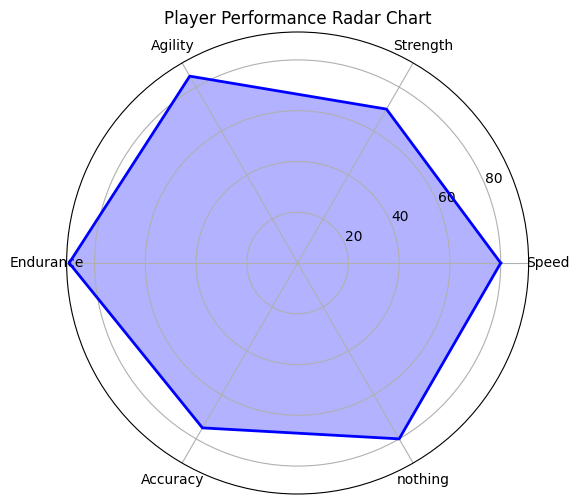

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sample Data (values for each attribute)
labels = ["Speed", "Strength", "Agility", "Endurance", "Accuracy","nothing"]
values = [80, 70, 85, 90, 75,80]  # Scores out of 100

# Convert to radians for the radar chart
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()

# Close the shape by repeating first value
values += values[:1]
angles += angles[:1]

# Plot radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='blue', alpha=0.3)  # Fill area
ax.plot(angles, values, color='blue', linewidth=2)  # Border line
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Show the plot
plt.title("Player Performance Radar Chart")
plt.show()


In [ ]:
# Core Imports
import streamlit as st
import pandas as pd
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler


In [ ]:
@st.cache_data
def load_data():
    df = pd.read_csv('occupation_data.csv')
    
    # Normalization pipeline
    numeric_cols = ['avg_salary', 'working_hours', 'participation_rate']
    scaler = MinMaxScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    
    return df

def filter_data(df, industries):
    return df[df['industry'].isin(industries)] if industries else df


2025-02-26 09:36:38.365 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


In [ ]:
def create_radar(occupation, normalized=True):
    metrics = ['avg_salary', 'working_hours', 'male_percent',
               'participation_rate', 'education_index']
    
    fig = go.Figure()
    fig.add_trace(go.Scatterpolar(
        r=occupation[metrics].values,
        theta=metrics,
        fill='toself',
        name=occupation['title']
    ))
    
    fig.update_layout(
        polar=dict(radialaxis=dict(visible=True, range=[0, 1])),
        margin=dict(l=20, r=20, t=20, b=20)
    )
    return fig


In [ ]:
def main():
    st.set_page_config(layout="wide")
    df = load_data()
    
    # Sidebar Filters
    with st.sidebar:
        industries = st.multiselect('Filter Industries', df['industry'].unique())
        occupations = st.multiselect('Compare Occupations', df['title'])
    
    # Data Filtering
    filtered_df = filter_data(df, industries)
    selected_data = filtered_df[filtered_df['title'].isin(occupations)]
    
    # Main Display
    col1, col2 = st.columns([2, 1])
    
    with col1:
        if not selected_data.empty:
            fig = create_radar(selected_data.iloc[0])
            for idx in range(1, len(selected_data)):
                fig.add_trace(create_radar(selected_data.iloc[idx]).data[0])
            st.plotly_chart(fig, use_container_width=True)
        else:
            st.warning("Select occupations to compare")
    
    with col2:
        st.dataframe(selected_data, height=400)


In [39]:
# Multi-select occupation comparison
# occupations = st.multiselect(
#     'Select up to 4 occupations',
#     df['title'],
#     default=df['title'].iloc[:2]
# )
